<a href="https://colab.research.google.com/github/azdinelaaouissi/ML/blob/main/char.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as  pd
import  seaborn as  sns
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout,MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/A_Z Handwritten Data.csv")

In [ ]:
df.shape

(372450, 785)

In [ ]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,372450.0,13.523490,6.740824,0.0,10.0,14.0,18.0,25.0
0.1,372450.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.2,372450.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.3,372450.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.4,372450.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
0.644,372450.0,0.000596,0.319820,0.0,0.0,0.0,0.0,194.0
0.645,372450.0,0.000618,0.208942,0.0,0.0,0.0,0.0,103.0
0.646,372450.0,0.000690,0.335227,0.0,0.0,0.0,0.0,198.0
0.647,372450.0,0.000239,0.134852,0.0,0.0,0.0,0.0,82.0


In [ ]:
df["0"].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
df.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [ ]:
df.duplicated().sum()

171355

In [5]:
X = df.drop('0', axis = 1)
y = df['0']

In [6]:
print(X.shape)
print(y.shape)

(372450, 784)
(372450,)


In [7]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2,random_state=42)


In [8]:
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

In [9]:
print(train_x.shape)
print(test_x.shape)

(297960, 28, 28)
(74490, 28, 28)


In [10]:
word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',
    15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

In [11]:
count=y.value_counts().sort_index().values

In [12]:
count

array([13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,  1120,
        8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812, 11566,
       48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [13]:
alphabets = list((word_dict.values()))
alphabets

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

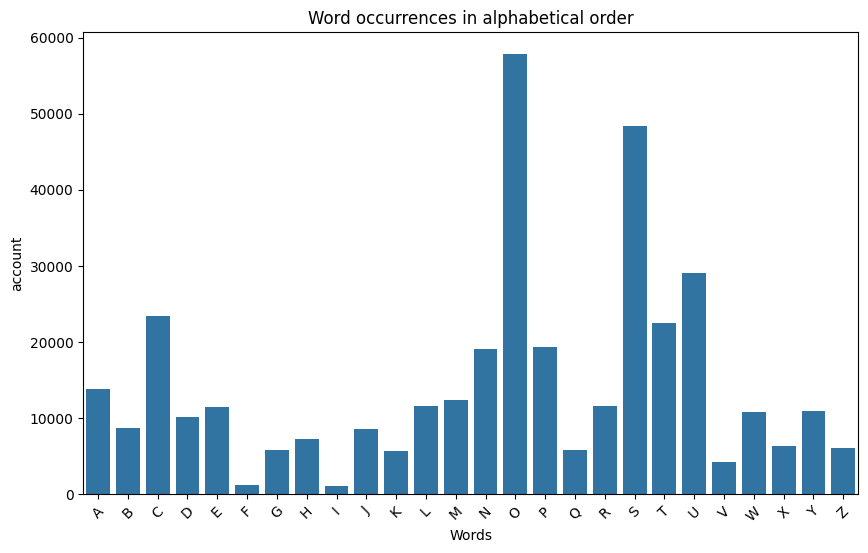

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=alphabets, y=count)
plt.xlabel('Words')
plt.ylabel('account')
plt.title('Word occurrences in alphabetical order')
plt.xticks(rotation=45)
plt.show()

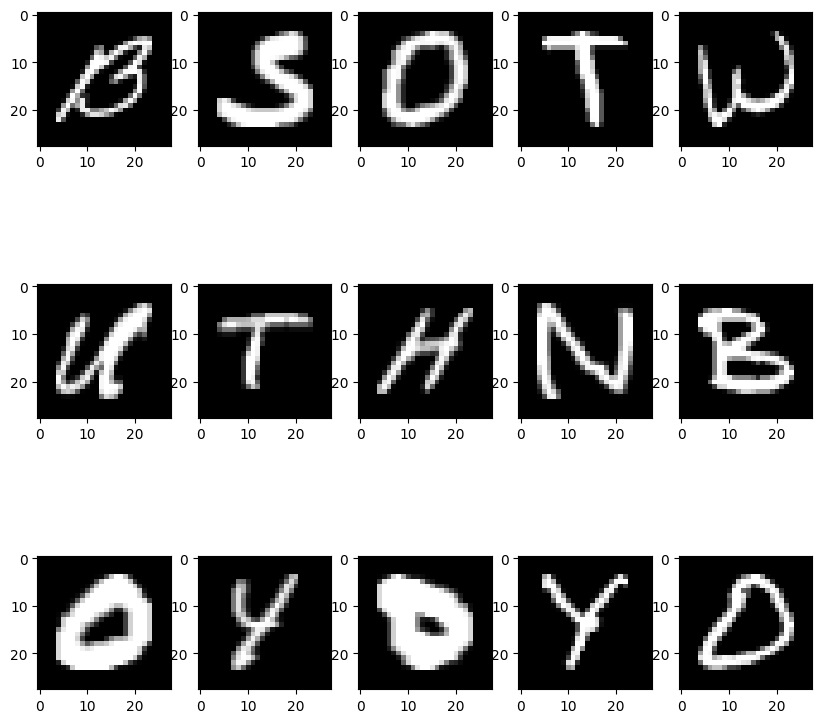

In [15]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,5, figsize = (10,10))
axes = ax.flatten()
for i in range(15):
    axes[i].imshow(shuff[i], cmap="gray")
plt.show()

In [16]:
test_x = np.reshape(test_x, (test_x.shape[0], 28,28,1))
train_x=np.reshape(train_x,(train_x.shape[0],28,28,1))

In [17]:
print(train_x.shape)
print(test_x.shape)

(297960, 28, 28, 1)
(74490, 28, 28, 1)


In [18]:
train_ycategorical = to_categorical(train_y , num_classes=26, dtype='int')
print("New shape of train labels: ", train_ycategorical.shape)

test_ycategorical = to_categorical(test_y , num_classes=26, dtype='int')
print("New shape of test labels: ", test_ycategorical.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [19]:
my_model = Sequential()

my_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'valid'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Flatten())


my_model.add(Dense(64, activation = "relu"))
my_model.add(Dense(128, activation = "relu"))

my_model.add(Dense(26, activation = "softmax"))

In [ ]:
my_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = my_model.fit(train_x, train_ycategorical, epochs = 1, validation_data = (test_x, test_ycategorical))

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))  # Assurez-vous que le nombre de classes est correct

# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(train_x, train_yOHE, epochs=10, batch_size=64, validation_split=0.2)

# Évaluation du modèle
test_loss, test_acc = model.evaluate(test_x, test_yOHE)
print('Accuracy on test data:', test_acc)

555/555 [==============================] - 5s 8ms/step - loss: 0.4999 - accuracy: 0.8417
Accuracy on test data: 0.8416666388511658


In [ ]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_72 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_73 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_23 (Flatten)        (None, 576)             

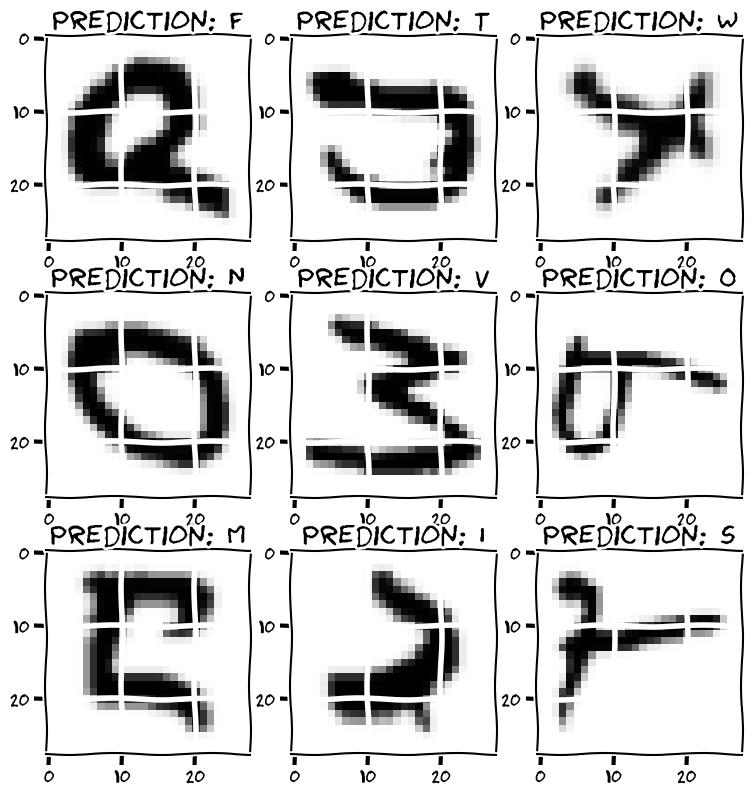

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_x[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()